In [1]:
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pylab as plt 
import matplotlib.lines as mlines
from matplotlib.legend import Legend
from pythonds.basic.stack import Stack
from math import *
from sklearn.neighbors import KDTree
from lrg_plot_functions import *
from lrg_sum_functions import *
from cosmo_Calc import *
from divideByTwo import *
from read_data import *
from nearNeighbors import *
from scipy import stats
from astropy import stats
import healpy as hp
from localBKG_and_interlopersHEALPix import *
# import healpy as hpy
from makeCutoutTableFunc import *
from plotHistogramProjections3D import *
from read_bricks import *
from mpl_toolkits.axes_grid1 import make_axes_locatable
import random

In [2]:
# read in data from fits files

# hdu_north = fits.open('/Users/mindy/Research/Data/lrgProjectData/survey-dr9-north-specObj-dr16.fits')
hdu_north = fits.open('/Users/mtownsend/anaconda/Data/survey-dr9-north-specObj-dr16.fits') # this matches SDSS LRGs to MzLS/BASS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS and LEGACY SURVEYS
# hdu_south = fits.open('/Users/mindy/Research/Data/lrgProjectData/survey-dr9-south-specObj-dr16.fits')
hdu_south = fits.open('/Users/mtownsend/anaconda/Data/survey-dr9-south-specObj-dr16.fits') # this matches SDSS LRGs to DECaLS;
                                                                 # ONLY GIVES SOURCES THAT ARE IN SDSS and LEGACY SURVEYS
hdu_sdss = fits.open('/Users/mtownsend/anaconda/Data/specObj-dr16.fits') # this is SDSS redshifts etc for LRGs
# hdu_sdss = fits.open('/Users/mindy/Research/Data/lrgProjectData/specObj-dr16.fits')
hdu_sweep1 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p005-250p010-dr9.fits') # this is one sweep file of the DECaLS data
# hdu_sweep1 = fits.open('/Users/mindy/Research/Data/lrgProjectData/sweep-240p005-250p010-dr9.fits')
hdu_sweep2 = fits.open('/Users/mtownsend/anaconda/Data/sweep-240p010-250p015-dr9.fits') # this is one sweep file of the DECaLS data
# hdu_sweep2 = fits.open('/Users/mindy/Research/Data/lrgProjectData/sweep-240p010-250p015-dr9.fits')

SpecObj_data_north = hdu_north[1].data
SpecObj_data_south = hdu_south[1].data
SDSS_data = hdu_sdss[1].data
DECaLS_data1 = hdu_sweep1[1].data
DECaLS_data2 = hdu_sweep2[1].data


In [10]:
# id_LRG1, plate_LRG1, fiberid_LRG1, specobjid_LRG1, ra_LRG1, dec_LRG1, ra_BKG1, dec_BKG1, z_LRG1, gflux_LRG1, rflux_LRG1, zflux_LRG1, w1flux_LRG1, w2flux_LRG1, w3flux_LRG1, w4flux_LRG1, gflux_BKG1, rflux_BKG1, zflux_BKG1, w1flux_BKG1, w2flux_BKG1, w3flux_BKG1, w4flux_BKG1, gflux_ivar_LRG1, rflux_ivar_LRG1, zflux_ivar_LRG1, w1flux_ivar_LRG1, w2flux_ivar_LRG1, w3flux_ivar_LRG1, w4flux_ivar_LRG1, gflux_ivar_BKG1, rflux_ivar_BKG1, zflux_ivar_BKG1, w1flux_ivar_BKG1, w2flux_ivar_BKG1, w3flux_ivar_BKG1, w4flux_ivar_BKG1, mw_transmission_g_LRG1, mw_transmission_r_LRG1, mw_transmission_z_LRG1, mw_transmission_g_BKG1, mw_transmission_r_BKG1, mw_transmission_z_BKG1, mw_transmission_w1_LRG1, mw_transmission_w2_LRG1, mw_transmission_w3_LRG1, mw_transmission_w4_LRG1, mw_transmission_w1_BKG1, mw_transmission_w2_BKG1, mw_transmission_w3_BKG1, mw_transmission_w4_BKG1 = readData(SpecObj_data_south, SDSS_data, DECaLS_data1)
# id_LRG2, plate_LRG2, fiberid_LRG2, specobjid_LRG2, ra_LRG2, dec_LRG2, ra_BKG2, dec_BKG2, z_LRG2, gflux_LRG2, rflux_LRG2, zflux_LRG2, w1flux_LRG2, w2flux_LRG2, w3flux_LRG2, w4flux_LRG2, gflux_BKG2, rflux_BKG2, zflux_BKG2, w1flux_BKG2, w2flux_BKG2, w3flux_BKG2, w4flux_BKG2, gflux_ivar_LRG2, rflux_ivar_LRG2, zflux_ivar_LRG2, w1flux_ivar_LRG2, w2flux_ivar_LRG2, w3flux_ivar_LRG2, w4flux_ivar_LRG2, gflux_ivar_BKG2, rflux_ivar_BKG2, zflux_ivar_BKG2, w1flux_ivar_BKG2, w2flux_ivar_BKG2, w3flux_ivar_BKG2, w4flux_ivar_BKG2, mw_transmission_g_LRG2, mw_transmission_r_LRG2, mw_transmission_z_LRG2, mw_transmission_g_BKG2, mw_transmission_r_BKG2, mw_transmission_z_BKG2, mw_transmission_w1_LRG2, mw_transmission_w2_LRG2, mw_transmission_w3_LRG2, mw_transmission_w4_LRG2, mw_transmission_w1_BKG2, mw_transmission_w2_BKG2, mw_transmission_w3_BKG2, mw_transmission_w4_BKG2 = readData(SpecObj_data_south, SDSS_data, DECaLS_data2)


# print("end readdata")

In [70]:
# read data function that I can modify as I need

def readData(SpecObj_data, SDSS_data, DECaLS_data):
    import numpy as np
    from pythonds.basic.stack import Stack

    # Read in data from SDSS file

    # Redshift of galaxies according to sdss
    z = []
    z = SDSS_data.field('Z')

    # Unique ID for sources in SDSS
    specobjid = []
    specobjid = SDSS_data.field('SPECOBJID')

    # Class of object
    gal_class = []
    gal_class = SDSS_data.field('CLASS')

    # What survey the data is from
    survey = []
    survey = SDSS_data.field('SURVEY')

    # SPECPRIMARY; set to 1 for primary observation of object, 0 otherwise
    spec = []
    spec = SDSS_data.field('SPECPRIMARY')

    # Bitmask of spectroscopic warning values; need set to 0
    zwarn_noqso = []
    zwarn_noqso = SDSS_data.field('ZWARNING_NOQSO')

    # Spectroscopic classification for certain redshift?
    class_noqso = []
    class_noqso = SDSS_data.field('CLASS_NOQSO')

    # Array for LRG targets
    targets = []
    targets = SDSS_data.field('BOSS_TARGET1')

    # Array for tile number (cut for LOWZ LRGs is tile >= 10324)
    tile = []
    tile = SDSS_data.field('TILE')

    # Array for chunk number (cut for CMASS is chunk != 'boss1' or 'boss2'
    chunk = []
    chunk = SDSS_data.field('CHUNK')

    plate = []
    plate = SDSS_data.field('PLATEID')

    fiberid = []
    fiberid = SDSS_data.field('FIBERID')

    print('done reading in SDSS')

    # ----------------------------------------------------------------------

    # Section of code to find LRG targets

    # def divideBy2(decNumber):
    #
    #     # from pythonds.basic.stack import Stack
    #     # import numpy as np
    #
    #     np.vectorize(decNumber)
    #     remstack = Stack()
    #
    #     if decNumber == 0: return "0"
    #
    #     while decNumber > 0:
    #         rem = decNumber % 2
    #         remstack.push(rem)
    #         decNumber = decNumber // 2
    #
    #     binString = ""
    #     while not remstack.isEmpty():
    #         binString = binString + str(remstack.pop())
    #
    #     return binString
    #
    # # Function to find LRG targets
    #
    # divideBy2Vec = np.vectorize(divideBy2)
    #
    #
    # a = divideBy2Vec(targets)  # gives binary in string form
    #
    # print(a)
    #
    # b = []
    #
    # for i in range(len(a)):
    #     b.append(list((a[i])))
    #     b[i].reverse()
    #
    #
    # lrg = []
    #
    # # Finds flags for BOSS LOWZ and CMASS sample
    # for i in range(len(b)):
    #     try:
    #         if (b[i][0] == '1') or (b[i][1] == '1'):
    #             lrg.append(int(1))
    #         else:
    #             lrg.append(int(0))
    #     except IndexError:
    #         pass
    #         lrg.append(int(0))
    #
    # lrg = np.array(lrg)
    #
    # print('done finding LRG flags')

    # ----------------------------------------------------------------------

    # Read in data from SDSS row matched DECaLS file

    # Object ID from survey file; value -1 for non-matches
    objid_MATCHED = []
    objid_MATCHED = SpecObj_data.field('OBJID')

    # Add brickid
    brickid_MATCHED = []
    brickid_MATCHED = SpecObj_data.field('BRICKID')

    # Add brickname
    brickname_MATCHED = []
    brickname_MATCHED = SpecObj_data.field('BRICKNAME')

    # Only galaxies included
    gal_type_MATCHED = []
    gal_type_MATCHED = SpecObj_data.field('TYPE')

    # RA
    ra_MATCHED = []
    ra_MATCHED = SpecObj_data.field('RA')

    # Dec
    dec_MATCHED = []
    dec_MATCHED = SpecObj_data.field('DEC')

    # flux_g
    gflux_MATCHED = []
    gflux_MATCHED = SpecObj_data.field('FLUX_G')

    # flux_r
    rflux_MATCHED = []
    rflux_MATCHED = SpecObj_data.field('FLUX_R')

    # flux_z
    zflux_MATCHED = []
    zflux_MATCHED = SpecObj_data.field('FLUX_Z')

    # flux_W1
    w1flux_MATCHED = []
    w1flux_MATCHED = SpecObj_data.field('flux_w1')

    # flux_W2
    w2flux_MATCHED = []
    w2flux_MATCHED = SpecObj_data.field('flux_w2')

    # flux_W3
    w3flux_MATCHED = []
    w3flux_MATCHED = SpecObj_data.field('flux_w3')

    # flux_W4
    w4flux_MATCHED = []
    w4flux_MATCHED = SpecObj_data.field('flux_w4')

    # nobs == number of images that contribute to the central pixel
    # nobs_g
    gobs_MATCHED = []
    gobs_MATCHED = SpecObj_data.field('NOBS_G')

    # nobs_r
    robs_MATCHED = []
    robs_MATCHED = SpecObj_data.field('NOBS_R')

    # nobs_z
    zobs_MATCHED = []
    zobs_MATCHED = SpecObj_data.field('NOBS_Z')

    #flux errors
    gflux_ivar_MATCHED = []
    gflux_ivar_MATCHED = SpecObj_data.field('flux_ivar_g')

    rflux_ivar_MATCHED = []
    rflux_ivar_MATCHED = SpecObj_data.field('flux_ivar_r')

    zflux_ivar_MATCHED = []
    zflux_ivar_MATCHED = SpecObj_data.field('flux_ivar_z')

    w1flux_ivar_MATCHED = []
    w1flux_ivar_MATCHED = SpecObj_data.field('flux_ivar_w1')

    w2flux_ivar_MATCHED = []
    w2flux_ivar_MATCHED = SpecObj_data.field('flux_ivar_w2')

    w3flux_ivar_MATCHED = []
    w3flux_ivar_MATCHED = SpecObj_data.field('flux_ivar_w3')

    w4flux_ivar_MATCHED = []
    w4flux_ivar_MATCHED = SpecObj_data.field('flux_ivar_w4')

    mw_transmission_g_MATCHED = []
    mw_transmission_g_MATCHED = SpecObj_data.field('mw_transmission_g')

    mw_transmission_r_MATCHED = []
    mw_transmission_r_MATCHED = SpecObj_data.field('mw_transmission_r')

    mw_transmission_z_MATCHED = []
    mw_transmission_z_MATCHED = SpecObj_data.field('mw_transmission_z')

    mw_transmission_w1_MATCHED = []
    mw_transmission_w1_MATCHED = SpecObj_data.field('mw_transmission_w1')

    mw_transmission_w2_MATCHED = []
    mw_transmission_w2_MATCHED = SpecObj_data.field('mw_transmission_w2')

    mw_transmission_w3_MATCHED = []
    mw_transmission_w3_MATCHED = SpecObj_data.field('mw_transmission_w3')

    mw_transmission_w4_MATCHED = []
    mw_transmission_w4_MATCHED = SpecObj_data.field('mw_transmission_w4')

    # maskbits
    maskbits_MATCHED = []
    maskbits_MATCHED = SpecObj_data.field('maskbits')

    print('done reading in DECaLS-SDSS matched file')

    # ----------------------------------------------------------------------

    # Create a unique identifier by combinding BRICKID and OBJID

    id_MATCHED = []

    for i in range(len(objid_MATCHED)):
        if (objid_MATCHED[i] == -1):
            id_MATCHED.append(-1)
        else:
            temp1 = str(brickid_MATCHED[i]) + str(objid_MATCHED[i])
            id_MATCHED.append(temp1)

    id_MATCHED = [int(i) for i in id_MATCHED]
    id_MATCHED = np.array(id_MATCHED)


    print('done creating unique IDs for matched file')
    # ----------------------------------------------------------------------

    # Select LRGs from SpecObj file (with other cuts)

    # LRG_only = ((((targets & 2**0)!=0) | ((targets & 2**1)!=0)) & ((maskbits_MATCHED & 2**1)==0) & ((maskbits_MATCHED & 2**11)==0) & ((maskbits_MATCHED & 2**12)==0) & ((maskbits_MATCHED & 2**13)==0) & ((maskbits_MATCHED & 2**5)==0) & ((maskbits_MATCHED & 2**6)==0) & ((maskbits_MATCHED & 2**7)==0) & (gobs_MATCHED >= 2.) & (robs_MATCHED >= 2.) & (zobs_MATCHED >= 2.) & (gflux_MATCHED > 0.) & (rflux_MATCHED > 0.) & (zflux_MATCHED > 0.) & (objid_MATCHED != -1) & ((gal_type_MATCHED == 'SIMP') | (gal_type_MATCHED == "DEV") | (gal_type_MATCHED == "EXP") | (gal_type_MATCHED == "REX")) & (ra_MATCHED >= 241) & (ra_MATCHED <= 246) & (dec_MATCHED >= 6.5) & (dec_MATCHED <= 11.5) & (tile >= 10324) & (gal_class == 'GALAXY') & (spec == 1) & (zwarn_noqso == 0) & (class_noqso == 'GALAXY') & ((survey == 'sdss') | (survey == 'boss')))
#     LRG_only = ((((targets & 2**0)!=0) | ((targets & 2**1)!=0)) & ((maskbits_MATCHED & 2**1)==0) & ((maskbits_MATCHED & 2**12)==0) & ((maskbits_MATCHED & 2**13)==0) & ((maskbits_MATCHED & 2**5)==0) & ((maskbits_MATCHED & 2**6)==0) & ((maskbits_MATCHED & 2**7)==0) & (gobs_MATCHED >= 2.) & (robs_MATCHED >= 2.) & (zobs_MATCHED >= 2.) & (gflux_MATCHED > 0.) & (rflux_MATCHED > 0.) & (zflux_MATCHED > 0.) & (objid_MATCHED != -1) & ((gal_type_MATCHED == 'SIMP') | (gal_type_MATCHED == "DEV") | (gal_type_MATCHED == "EXP") | (gal_type_MATCHED == "REX")) & (ra_MATCHED >= 241) & (ra_MATCHED <= 246) & (dec_MATCHED >= 6.5) & (dec_MATCHED <= 11.5) & (tile >= 10324) & (gal_class == 'GALAXY') & (spec == 1) & (zwarn_noqso == 0) & (class_noqso == 'GALAXY') & ((survey == 'sdss') | (survey == 'boss')))
#     LRG_only = ((((targets & 2**0)!=0) | ((targets & 2**1)!=0)) & (gobs_MATCHED >= 2.) & (robs_MATCHED >= 2.) & (zobs_MATCHED >= 2.) & (gflux_MATCHED > 0.) & (rflux_MATCHED > 0.) & (zflux_MATCHED > 0.) & (objid_MATCHED != -1) & ((gal_type_MATCHED == 'COMP') | (gal_type_MATCHED == "DEV") | (gal_type_MATCHED == "EXP") | (gal_type_MATCHED == "REX")) & (ra_MATCHED >= 241) & (ra_MATCHED <= 246) & (dec_MATCHED >= 6.5) & (dec_MATCHED <= 11.5) & (tile >= 10324) & (gal_class == 'GALAXY') & (spec == 1) & (zwarn_noqso == 0) & (class_noqso == 'GALAXY') & ((survey == 'sdss') | (survey == 'boss')))
    LRG_only = ((((targets & 2**0)!=0) | ((targets & 2**1)!=0)) & ((maskbits_MATCHED & 2**5)==0) & ((maskbits_MATCHED & 2**6)==0) & ((maskbits_MATCHED & 2**7)==0) & (gobs_MATCHED >= 2.) & (robs_MATCHED >= 2.) & (zobs_MATCHED >= 2.) & (gflux_MATCHED > 0.) & (rflux_MATCHED > 0.) & (zflux_MATCHED > 0.) & (objid_MATCHED != -1) & ((gal_type_MATCHED == 'SER') | (gal_type_MATCHED == "DEV") | (gal_type_MATCHED == "EXP") | (gal_type_MATCHED == "REX")) & (ra_MATCHED >= 241) & (ra_MATCHED <= 246) & (dec_MATCHED >= 6.5) & (dec_MATCHED <= 11.5) & (tile >= 10324) & (gal_class == 'GALAXY') & (spec == 1) & (zwarn_noqso == 0) & (class_noqso == 'GALAXY') & ((survey == 'sdss') | (survey == 'boss')))

    z_LRG = z[LRG_only]
    ra_LRG = ra_MATCHED[LRG_only]
    dec_LRG = dec_MATCHED[LRG_only]
    gflux_LRG = gflux_MATCHED[LRG_only]
    rflux_LRG = rflux_MATCHED[LRG_only]
    zflux_LRG = zflux_MATCHED[LRG_only]
    w1flux_LRG = w1flux_MATCHED[LRG_only]
    w2flux_LRG = w2flux_MATCHED[LRG_only]
    w3flux_LRG = w3flux_MATCHED[LRG_only]
    w4flux_LRG = w4flux_MATCHED[LRG_only]
    gflux_ivar_LRG = gflux_ivar_MATCHED[LRG_only]
    rflux_ivar_LRG = rflux_ivar_MATCHED[LRG_only]
    zflux_ivar_LRG = zflux_ivar_MATCHED[LRG_only]
    w1flux_ivar_LRG = w1flux_ivar_MATCHED[LRG_only]
    w2flux_ivar_LRG = w2flux_ivar_MATCHED[LRG_only]
    w3flux_ivar_LRG = w3flux_ivar_MATCHED[LRG_only]
    w4flux_ivar_LRG = w4flux_ivar_MATCHED[LRG_only]
    id_LRG = id_MATCHED[LRG_only]
    specobjid_LRG = specobjid[LRG_only]
    plate_LRG = plate[LRG_only]
    fiberid_LRG = fiberid[LRG_only]
    mw_transmission_g_LRG = mw_transmission_g_MATCHED[LRG_only]
    mw_transmission_r_LRG = mw_transmission_r_MATCHED[LRG_only]
    mw_transmission_z_LRG = mw_transmission_z_MATCHED[LRG_only]
    mw_transmission_w1_LRG = mw_transmission_w1_MATCHED[LRG_only]
    mw_transmission_w2_LRG = mw_transmission_w2_MATCHED[LRG_only]
    mw_transmission_w3_LRG = mw_transmission_w3_MATCHED[LRG_only]
    mw_transmission_w4_LRG = mw_transmission_w4_MATCHED[LRG_only]
    maskbits_LRG = maskbits_MATCHED[LRG_only]


    print('done making LRG only cut')
    # ----------------------------------------------------------------------


    # Read in data from DECaLS bricks

    # Object ID from survey file
    objid_ALL = []
    objid_ALL = DECaLS_data.field('OBJID')
    # print(len(objid_ALL))

    # Add brickid
    brickid_ALL = []
    brickid_ALL = DECaLS_data.field('BRICKID')

    # Add brickname
    brickname_ALL = []
    brickname_ALL = DECaLS_data.field('BRICKNAME')

    # Only galaxies included
    gal_type_ALL = []
    gal_type_ALL = DECaLS_data.field('TYPE')

    # RA
    ra_ALL = []
    ra_ALL = DECaLS_data.field('RA')

    # Dec
    dec_ALL = []
    dec_ALL = DECaLS_data.field('DEC')

    # flux_g
    gflux_ALL = []
    gflux_ALL = DECaLS_data.field('FLUX_G')

    # flux_r
    rflux_ALL = []
    rflux_ALL = DECaLS_data.field('FLUX_R')

    # flux_z
    zflux_ALL = []
    zflux_ALL = DECaLS_data.field('FLUX_Z')

    # flux_W1
    w1flux_ALL = []
    w1flux_ALL = DECaLS_data.field('flux_w1')

    # flux_W2
    w2flux_ALL = []
    w2flux_ALL = DECaLS_data.field('flux_w2')

    # flux_W3
    w3flux_ALL = []
    w3flux_ALL = DECaLS_data.field('flux_w3')

    # flux_W4
    w4flux_ALL = []
    w4flux_ALL = DECaLS_data.field('flux_w4')

    # nobs == number of images that contribute to the central pixel
    # nobs_g
    gobs_ALL = []
    gobs_ALL = DECaLS_data.field('NOBS_G')

    # nobs_r
    robs_ALL = []
    robs_ALL = DECaLS_data.field('NOBS_R')

    # nobs_z
    zobs_ALL = []
    zobs_ALL = DECaLS_data.field('NOBS_Z')

    # flux errors
    gflux_ivar_ALL = []
    gflux_ivar_ALL = DECaLS_data.field('flux_ivar_g')

    rflux_ivar_ALL = []
    rflux_ivar_ALL = DECaLS_data.field('flux_ivar_r')

    zflux_ivar_ALL = []
    zflux_ivar_ALL = DECaLS_data.field('flux_ivar_z')

    w1flux_ivar_ALL = []
    w1flux_ivar_ALL = DECaLS_data.field('flux_ivar_w1')

    w2flux_ivar_ALL = []
    w2flux_ivar_ALL = DECaLS_data.field('flux_ivar_w2')

    w3flux_ivar_ALL = []
    w3flux_ivar_ALL = DECaLS_data.field('flux_ivar_w3')

    w4flux_ivar_ALL = []
    w4flux_ivar_ALL = DECaLS_data.field('flux_ivar_w4')

    mw_transmission_g_ALL = []
    mw_transmission_g_ALL = DECaLS_data.field('mw_transmission_g')

    mw_transmission_r_ALL = []
    mw_transmission_r_ALL = DECaLS_data.field('mw_transmission_r')

    mw_transmission_z_ALL = []
    mw_transmission_z_ALL = DECaLS_data.field('mw_transmission_z')

    mw_transmission_w1_ALL = []
    mw_transmission_w1_ALL = DECaLS_data.field('mw_transmission_w1')

    mw_transmission_w2_ALL = []
    mw_transmission_w2_ALL = DECaLS_data.field('mw_transmission_w2')

    mw_transmission_w3_ALL = []
    mw_transmission_w3_ALL = DECaLS_data.field('mw_transmission_w3')

    mw_transmission_w4_ALL = []
    mw_transmission_w4_ALL = DECaLS_data.field('mw_transmission_w4')

    # maskbits
    maskbits_ALL = []
    maskbits_ALL = DECaLS_data.field('maskbits')

    print('done reading in DECaLS bricks')

    # ----------------------------------------------------------------------

    # Create a unique identifier by combinding BRICKID and OBJID

    id_ALL = []

    for i in range(len(objid_ALL)):
        temp2 = str(brickid_ALL[i]) + str(objid_ALL[i])
        id_ALL.append(temp2)

    id_ALL = [int(i) for i in id_ALL]
    id_ALL = np.array(id_ALL)

    print('length of id_ALL: ', len(id_ALL))
    print('done creating unique IDs for brick file')

    # ----------------------------------------------------------------------

    # Identifies LRGs in survey brick

    idcut = []

    # This creates a list that is the length of id_ALL that matches LRGs from the DECaLS/SDSS file to the DECaLS file
    # For use in narrowing down DECaLS-only file (ie 'ALL')
    # idcut = 1 if it is an LRG; idcut = 0 if it is not an LRG
    for i in range(len(id_ALL)):
        if any(id_LRG == id_ALL[i]):
            idcut.append(1)
        else:
            idcut.append(0)

    idcut = np.array(idcut)

    print('done identifying LRGs in survey brick')

    # ----------------------------------------------------------------------

    # Make relevant cuts for survey brick; eliminates LRGs

    # survey_cut = (((maskbits_ALL & 2**1)==0) & ((maskbits_ALL & 2**11)==0) & ((maskbits_ALL & 2**12)==0) & ((maskbits_ALL & 2**13)==0) & ((maskbits_ALL & 2**5)==0) & ((maskbits_ALL & 2**6)==0) & ((maskbits_ALL & 2**7)==0) & (idcut == 0) & (gobs_ALL >= 2.) & (robs_ALL >= 2.) & (zobs_ALL >= 2.) & (gflux_ALL > 0.) & (rflux_ALL > 0.) & (zflux_ALL > 0.) & ((gal_type_ALL == 'SIMP') | (gal_type_ALL == "DEV") | (gal_type_ALL == "EXP") | (gal_type_ALL == "REX")) & (ra_ALL >= 241) & (ra_ALL <= 246) & (dec_ALL >= 6.5) & (dec_ALL <= 11.5))
    # survey_cut = (((maskbits_ALL & 2**1)==0) & ((maskbits_ALL & 2**12)==0) & ((maskbits_ALL & 2**13)==0) & ((maskbits_ALL & 2**5)==0) & ((maskbits_ALL & 2**6)==0) & ((maskbits_ALL & 2**7)==0) & (idcut == 0) & (gobs_ALL >= 2.) & (robs_ALL >= 2.) & (zobs_ALL >= 2.) & (gflux_ALL > 0.) & (rflux_ALL > 0.) & (zflux_ALL > 0.) & ((gal_type_ALL == 'SIMP') | (gal_type_ALL == "DEV") | (gal_type_ALL == "EXP") | (gal_type_ALL == "REX")) & (ra_ALL >= 241) & (ra_ALL <= 246) & (dec_ALL >= 6.5) & (dec_ALL <= 11.5))
#     survey_cut = (((maskbits_ALL & 2**1)==0) & ((maskbits_ALL & 2**12)==0) & ((maskbits_ALL & 2**13)==0) & ((maskbits_ALL & 2**5)==0) & ((maskbits_ALL & 2**6)==0) & ((maskbits_ALL & 2**7)==0) & (idcut == 0) & (gobs_ALL >= 2.) & (robs_ALL >= 2.) & (zobs_ALL >= 2.) & (gflux_ALL > 0.) & (rflux_ALL > 0.) & (zflux_ALL > 0.) & ((gal_type_ALL == 'SIMP') | (gal_type_ALL == "DEV") | (gal_type_ALL == "EXP") | (gal_type_ALL == "REX")) & (ra_ALL >= 240.) & (ra_ALL <= 247.) & (dec_ALL >= 5.) & (dec_ALL <= 12.5))
#     survey_cut = (((maskbits_ALL & 2**5)==0) & ((maskbits_ALL & 2**6)==0) & ((maskbits_ALL & 2**7)==0) & (idcut == 0) & (gobs_ALL >= 2.) & (robs_ALL >= 2.) & (zobs_ALL >= 2.) & (gflux_ALL > 0.) & (rflux_ALL > 0.) & (zflux_ALL > 0.) & ((gal_type_ALL == 'SIMP') | (gal_type_ALL == "DEV") | (gal_type_ALL == "EXP") | (gal_type_ALL == "REX")) & (ra_ALL >= 240.) & (ra_ALL <= 247.) & (dec_ALL >= 5.) & (dec_ALL <= 12.5))
    survey_cut = (((maskbits_ALL & 2**5)==0) & ((maskbits_ALL & 2**6)==0) & ((maskbits_ALL & 2**7)==0) & (idcut == 0) & (gobs_ALL >= 2.) & (robs_ALL >= 2.) & (zobs_ALL >= 2.) & (gflux_ALL > 0.) & (rflux_ALL > 0.) & (zflux_ALL > 0.) & ((gal_type_ALL == 'SER') | (gal_type_ALL == "DEV") | (gal_type_ALL == "EXP") | (gal_type_ALL == "REX")) & (ra_ALL >= 240.) & (ra_ALL <= 247.) & (dec_ALL >= 5.) & (dec_ALL <= 12.5))  
#     survey_cut = (((gal_type_ALL == 'PSF') | (gal_type_ALL == "DUP")) & (ra_ALL >= 240.) & (ra_ALL <= 247.) & (dec_ALL >= 5.) & (dec_ALL <= 12.5))


    ra_BKG = ra_ALL[survey_cut]
    dec_BKG = dec_ALL[survey_cut]
    gflux_BKG = gflux_ALL[survey_cut]
    rflux_BKG = rflux_ALL[survey_cut]
    zflux_BKG = zflux_ALL[survey_cut]
    w1flux_BKG = w1flux_ALL[survey_cut]
    w2flux_BKG = w2flux_ALL[survey_cut]
    w3flux_BKG = w3flux_ALL[survey_cut]
    w4flux_BKG = w4flux_ALL[survey_cut]
    gflux_ivar_BKG = gflux_ivar_ALL[survey_cut]
    rflux_ivar_BKG = rflux_ivar_ALL[survey_cut]
    zflux_ivar_BKG = zflux_ivar_ALL[survey_cut]
    w1flux_ivar_BKG = w1flux_ivar_ALL[survey_cut]
    w2flux_ivar_BKG = w2flux_ivar_ALL[survey_cut]
    w3flux_ivar_BKG = w3flux_ivar_ALL[survey_cut]
    w4flux_ivar_BKG = w4flux_ivar_ALL[survey_cut]
    mw_transmission_g_BKG = mw_transmission_g_ALL[survey_cut]
    mw_transmission_r_BKG = mw_transmission_r_ALL[survey_cut]
    mw_transmission_z_BKG = mw_transmission_z_ALL[survey_cut]
    mw_transmission_w1_BKG = mw_transmission_w1_ALL[survey_cut]
    mw_transmission_w2_BKG = mw_transmission_w2_ALL[survey_cut]
    mw_transmission_w3_BKG = mw_transmission_w3_ALL[survey_cut]
    mw_transmission_w4_BKG = mw_transmission_w4_ALL[survey_cut]
    maskbits_BKG = maskbits_ALL[survey_cut]



    print(len(ra_BKG))
    print('done making survey cuts')

    return maskbits_LRG, maskbits_BKG, id_LRG, plate_LRG, fiberid_LRG, specobjid_LRG, ra_LRG, dec_LRG, ra_BKG, dec_BKG, z_LRG, gflux_LRG, rflux_LRG, zflux_LRG, w1flux_LRG, w2flux_LRG, w3flux_LRG, w4flux_LRG, gflux_BKG, rflux_BKG, zflux_BKG, w1flux_BKG, w2flux_BKG, w3flux_BKG, w4flux_BKG, gflux_ivar_LRG, rflux_ivar_LRG, zflux_ivar_LRG, w1flux_ivar_LRG, w2flux_ivar_LRG, w3flux_ivar_LRG, w4flux_ivar_LRG, gflux_ivar_BKG, rflux_ivar_BKG, zflux_ivar_BKG, w1flux_ivar_BKG, w2flux_ivar_BKG, w3flux_ivar_BKG, w4flux_ivar_BKG, mw_transmission_g_LRG, mw_transmission_r_LRG, mw_transmission_z_LRG, mw_transmission_g_BKG, mw_transmission_r_BKG, mw_transmission_z_BKG, mw_transmission_w1_LRG, mw_transmission_w2_LRG, mw_transmission_w3_LRG, mw_transmission_w4_LRG, mw_transmission_w1_BKG, mw_transmission_w2_BKG, mw_transmission_w3_BKG, mw_transmission_w4_BKG
#     return maskbits_LRG, maskbits_BKG, id_LRG, plate_LRG, fiberid_LRG, specobjid_LRG, ra_LRG, dec_LRG, z_LRG, gflux_LRG, rflux_LRG, zflux_LRG, w1flux_LRG, w2flux_LRG, w3flux_LRG, w4flux_LRG, gflux_ivar_LRG, rflux_ivar_LRG, zflux_ivar_LRG, w1flux_ivar_LRG, w2flux_ivar_LRG, w3flux_ivar_LRG, w4flux_ivar_LRG, mw_transmission_g_LRG, mw_transmission_r_LRG, mw_transmission_z_LRG, mw_transmission_w1_LRG, mw_transmission_w2_LRG, mw_transmission_w3_LRG, mw_transmission_w4_LRG
#     return maskbits_LRG, id_LRG, plate_LRG, fiberid_LRG, specobjid_LRG, ra_LRG, dec_LRG, z_LRG, gflux_LRG, rflux_LRG, zflux_LRG, w1flux_LRG, w2flux_LRG, w3flux_LRG, w4flux_LRG, gflux_ivar_LRG, rflux_ivar_LRG, zflux_ivar_LRG, w1flux_ivar_LRG, w2flux_ivar_LRG, w3flux_ivar_LRG, w4flux_ivar_LRG, mw_transmission_g_LRG, mw_transmission_r_LRG, mw_transmission_z_LRG, mw_transmission_w1_LRG, mw_transmission_w2_LRG, mw_transmission_w3_LRG, mw_transmission_w4_LRG


# maskbits_LRG1, id_LRG1, plate_LRG1, fiberid_LRG1, specobjid_LRG1, ra_LRG1, dec_LRG1, z_LRG1, gflux_LRG1, rflux_LRG1, zflux_LRG1, w1flux_LRG1, w2flux_LRG1, w3flux_LRG1, w4flux_LRG1, gflux_ivar_LRG1, rflux_ivar_LRG1, zflux_ivar_LRG1, w1flux_ivar_LRG1, w2flux_ivar_LRG1, w3flux_ivar_LRG1, w4flux_ivar_LRG1, mw_transmission_g_LRG1, mw_transmission_r_LRG1, mw_transmission_z_LRG1, mw_transmission_w1_LRG1, mw_transmission_w2_LRG1, mw_transmission_w3_LRG1, mw_transmission_w4_LRG1  = readData(SpecObj_data_south, SDSS_data, DECaLS_data1)
maskbits_LRG1, maskbits_BKG1, id_LRG1, plate_LRG1, fiberid_LRG1, specobjid_LRG1, ra_LRG1, dec_LRG1, ra_BKG1, dec_BKG1, z_LRG1, gflux_LRG1, rflux_LRG1, zflux_LRG1, w1flux_LRG1, w2flux_LRG1, w3flux_LRG1, w4flux_LRG1, gflux_BKG1, rflux_BKG1, zflux_BKG1, w1flux_BKG1, w2flux_BKG1, w3flux_BKG1, w4flux_BKG1, gflux_ivar_LRG1, rflux_ivar_LRG1, zflux_ivar_LRG1, w1flux_ivar_LRG1, w2flux_ivar_LRG1, w3flux_ivar_LRG1, w4flux_ivar_LRG1, gflux_ivar_BKG1, rflux_ivar_BKG1, zflux_ivar_BKG1, w1flux_ivar_BKG1, w2flux_ivar_BKG1, w3flux_ivar_BKG1, w4flux_ivar_BKG1, mw_transmission_g_LRG1, mw_transmission_r_LRG1, mw_transmission_z_LRG1, mw_transmission_g_BKG1, mw_transmission_r_BKG1, mw_transmission_z_BKG1, mw_transmission_w1_LRG1, mw_transmission_w2_LRG1, mw_transmission_w3_LRG1, mw_transmission_w4_LRG1, mw_transmission_w1_BKG1, mw_transmission_w2_BKG1, mw_transmission_w3_BKG1, mw_transmission_w4_BKG1 = readData(SpecObj_data_south, SDSS_data, DECaLS_data1)
maskbits_LRG2, maskbits_BKG2, id_LRG2, plate_LRG2, fiberid_LRG2, specobjid_LRG2, ra_LRG2, dec_LRG2, ra_BKG2, dec_BKG2, z_LRG2, gflux_LRG2, rflux_LRG2, zflux_LRG2, w1flux_LRG2, w2flux_LRG2, w3flux_LRG2, w4flux_LRG2, gflux_BKG2, rflux_BKG2, zflux_BKG2, w1flux_BKG2, w2flux_BKG2, w3flux_BKG2, w4flux_BKG2, gflux_ivar_LRG2, rflux_ivar_LRG2, zflux_ivar_LRG2, w1flux_ivar_LRG2, w2flux_ivar_LRG2, w3flux_ivar_LRG2, w4flux_ivar_LRG2, gflux_ivar_BKG2, rflux_ivar_BKG2, zflux_ivar_BKG2, w1flux_ivar_BKG2, w2flux_ivar_BKG2, w3flux_ivar_BKG2, w4flux_ivar_BKG2, mw_transmission_g_LRG2, mw_transmission_r_LRG2, mw_transmission_z_LRG2, mw_transmission_g_BKG2, mw_transmission_r_BKG2, mw_transmission_z_BKG2, mw_transmission_w1_LRG2, mw_transmission_w2_LRG2, mw_transmission_w3_LRG2, mw_transmission_w4_LRG2, mw_transmission_w1_BKG2, mw_transmission_w2_BKG2, mw_transmission_w3_BKG2, mw_transmission_w4_BKG2 = readData(SpecObj_data_south, SDSS_data, DECaLS_data2)

print('done reading in data')

done reading in SDSS
done reading in DECaLS-SDSS matched file
done creating unique IDs for matched file
done making LRG only cut
done reading in DECaLS bricks
length of id_ALL:  4956380
done creating unique IDs for brick file
done identifying LRGs in survey brick
1508611
done making survey cuts
done reading in SDSS
done reading in DECaLS-SDSS matched file
done creating unique IDs for matched file
done making LRG only cut
done reading in DECaLS bricks
length of id_ALL:  4471575
done creating unique IDs for brick file
done identifying LRGs in survey brick
712411
done making survey cuts
done reading in data


In [4]:
# read_data function for stars

# read data function that I can modify as I need

def readData(DECaLS_data):
    import numpy as np
    from pythonds.basic.stack import Stack

    # Read in data from DECaLS bricks

    # Only galaxies included
    gal_type = []
    gal_type = DECaLS_data.field('TYPE')

    # RA
    ra = []
    ra = DECaLS_data.field('RA')

    # Dec
    dec = []
    dec = DECaLS_data.field('DEC')
    
    # catalog source is from
    ref_cat = []
    ref_cat = DECaLS_data.field('ref_cat')
    
    # gaia g-band mag
    gaia_phot_g_mean_mag = []
    gaia_phot_g_mean_mag = DECaLS_data.field('gaia_phot_g_mean_mag')

    # maskbits
    maskbits = []
    maskbits = DECaLS_data.field('maskbits')
    
    # flux_g
    gflux = []
    gflux = DECaLS_data.field('FLUX_G')

    # flux_r
    rflux = []
    rflux = DECaLS_data.field('FLUX_R')

    # flux_z
    zflux = []
    zflux = DECaLS_data.field('FLUX_Z')

    print('done reading in DECaLS bricks')


    # Make relevant cuts for survey brick; eliminates LRGs

    survey_cut = ((gflux > 0.) & (rflux > 0.) & (zflux > 0.) & (gal_type == 'PSF') & (ra >= 240) & (ra <= 247) & (dec >= 5.) & (dec <= 12.5))

    ra_STAR = ra[survey_cut]
    dec_STAR = dec[survey_cut]
    maskbits_STAR = maskbits[survey_cut]
    ref_cat_STAR = ref_cat[survey_cut]
    gaia_phot_g_mean_mag_STAR = gaia_phot_g_mean_mag[survey_cut]

    print('done making survey cuts')

    return ra_STAR, dec_STAR, maskbits_STAR, ref_cat_STAR, gaia_phot_g_mean_mag_STAR
    
    
ra_STAR1, dec_STAR1, maskbits_STAR1, ref_cat_STAR1, gaia_phot_g_mean_mag_STAR1 = readData(DECaLS_data1)
ra_STAR2, dec_STAR2, maskbits_STAR2, ref_cat_STAR2, gaia_phot_g_mean_mag_STAR2 = readData(DECaLS_data2)

print('done reading in data')

done reading in DECaLS bricks
done making survey cuts
done reading in DECaLS bricks
done making survey cuts
done reading in data


In [71]:
print(len(ra_LRG1))
# print(len(ra_LRG2))

2365


In [73]:
# calculate LRG magnitudes

gmag_LRG_nocuts = 22.5 - 2.5 * np.log10(gflux_LRG1/mw_transmission_g_LRG1)
rmag_LRG_nocuts = 22.5 - 2.5 * np.log10(rflux_LRG1/mw_transmission_r_LRG1)
zmag_LRG_nocuts = 22.5 - 2.5 * np.log10(zflux_LRG1/mw_transmission_z_LRG1)

print(len(zmag_LRG_nocuts))

# calculate BKG magnitudes

gmag_BKG1 = 22.5 - 2.5 * np.log10(gflux_BKG1)
gmag_BKG2 = 22.5 - 2.5 * np.log10(gflux_BKG2)
rmag_BKG1 = 22.5 - 2.5 * np.log10(rflux_BKG1)
rmag_BKG2 = 22.5 - 2.5 * np.log10(rflux_BKG2)
zmag_BKG1 = 22.5 - 2.5 * np.log10(zflux_BKG1)
zmag_BKG2 = 22.5 - 2.5 * np.log10(zflux_BKG2)

gmag_BKG_nocuts = np.concatenate([gmag_BKG1, gmag_BKG2])
rmag_BKG_nocuts = np.concatenate([rmag_BKG1, rmag_BKG2])
zmag_BKG_nocuts = np.concatenate([zmag_BKG1, zmag_BKG2])
maskbits_BKG_nocuts = np.concatenate([maskbits_BKG1, maskbits_BKG2])
  
    
# zmag_cut_test = np.concatenate([zmag_LRG_nocuts, zmag_BKG])
    
# calculate LRG (g-r) and (r-z) colors
    
grcolor_LRG_nocuts = gmag_LRG_nocuts - rmag_LRG_nocuts
rzcolor_LRG_nocuts = rmag_LRG_nocuts - zmag_LRG_nocuts
    
# calculate BKG (g-r) and (r-z) colors
    
grcolor_BKG_nocuts = gmag_BKG_nocuts - rmag_BKG_nocuts
rzcolor_BKG_nocuts = rmag_BKG_nocuts - zmag_BKG_nocuts

# create full list of LRG attributes

ra_LRG_nocuts = ra_LRG1
ra_BKG_nocuts = np.concatenate([ra_BKG1, ra_BKG2])
dec_LRG_nocuts = dec_LRG1
dec_BKG_nocuts = np.concatenate([dec_BKG1, dec_BKG2])
z_LRG_nocuts = z_LRG1
id_LRG_nocuts = id_LRG1
maskbits_LRG_nocuts = maskbits_LRG1

ra_nocuts = np.concatenate([ra_LRG_nocuts, ra_BKG_nocuts])
dec_nocuts = np.concatenate([dec_LRG_nocuts, dec_BKG_nocuts])

# cut for zmag brighter than 22.36

ra_LRG_temp = ra_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
dec_LRG_temp = dec_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
id_LRG_temp = id_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
z_LRG_temp = z_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
gmag_LRG_temp = gmag_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
rmag_LRG_temp = rmag_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
zmag_LRG_temp = zmag_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
grcolor_LRG_temp = grcolor_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
rzcolor_LRG_temp = rzcolor_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
maskbits_LRG_temp = maskbits_LRG_nocuts[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]


# calculate rest-frame magnitudes

# K_correct = -2.5*np.log10((1. + z_LRG_temp)**-1.)
# Mz = zmag_LRG_temp - DM_arr - K_correct
# Lz = 10.**((Mz-Msun_z)/(-2.5))
# log_Lz = np.log10(Lz)

ra_LRG = ra_LRG_temp #[np.where(log_Lz > 10.5)]
dec_LRG = dec_LRG_temp # [np.where(log_Lz > 10.5)]
id_LRG = id_LRG_temp # [np.where(log_Lz > 10.5)]
z_LRG = z_LRG_temp # [np.where(log_Lz > 10.5)]
maskbits_LRG = maskbits_LRG_temp

# plate_LRG = plate_LRG1[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]
# fiberid_LRG = fiberid_LRG1[np.where((z_LRG_nocuts >= 0.2) & (z_LRG_nocuts <= 0.65) & (zmag_LRG_nocuts <= 22.36))]

gmag_LRG = gmag_LRG_temp # [np.where(log_Lz > 10.5)]
rmag_LRG = rmag_LRG_temp # [np.where(log_Lz > 10.5)]
zmag_LRG = zmag_LRG_temp # [np.where(log_Lz > 10.5)]
grcolor_LRG = grcolor_LRG_temp # [np.where(log_Lz > 10.5)]
rzcolor_LRG = rzcolor_LRG_temp# [np.where(log_Lz > 10.5)]

ra_BKG = ra_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
dec_BKG = dec_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]

gmag_BKG = gmag_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
rmag_BKG = rmag_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
zmag_BKG = zmag_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
grcolor_BKG = grcolor_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
rzcolor_BKG = rzcolor_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]
maskbits_BKG = maskbits_BKG_nocuts[np.where(zmag_BKG_nocuts <= 22.36)]

# combine LRG and BKG lists

ra = np.concatenate([ra_LRG, ra_BKG])
dec = np.concatenate([dec_LRG, dec_BKG])

gmag = np.concatenate([gmag_LRG, gmag_BKG])
rmag = np.concatenate([rmag_LRG, rmag_BKG])
zmag = np.concatenate([zmag_LRG, zmag_BKG])

grcolor = np.concatenate([grcolor_LRG, grcolor_BKG]) 
rzcolor = np.concatenate([rzcolor_LRG, rzcolor_BKG]) 

print(len(ra_LRG))
print(len(ra_BKG))
print(len(ra))


2365
2100
1231849
1233949


In [9]:
# star data

ra_STAR = np.concatenate([ra_STAR1, ra_STAR2])
dec_STAR = np.concatenate([dec_STAR1, dec_STAR2])
maskbits_STAR = np.concatenate([maskbits_STAR1, maskbits_STAR2])
ref_cat_STAR = np.concatenate([ref_cat_STAR1, ref_cat_STAR2])
gaia_phot_g_mean_mag_STAR = np.concatenate([gaia_phot_g_mean_mag_STAR1, gaia_phot_g_mean_mag_STAR2])

print(len(ra_STAR))
print(len(dec_STAR))
print(len(maskbits_STAR))
print(len(ref_cat_STAR))
print(len(gaia_phot_g_mean_mag_STAR))


# save star arrays

np.savez('/Users/mtownsend/Documents/LRG_Data/ra_STARS-dr9.npz', ra_STAR=ra_STAR)
data_raBKG = np.load('/Users/mtownsend/Documents/LRG_Data/ra_STARS-dr9.npz')
raSTAR = data_raBKG['ra_STAR']
print(raSTAR.shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/dec_STARS-dr9.npz', dec_STAR=dec_STAR)
data_decBKG = np.load('/Users/mtownsend/Documents/LRG_Data/dec_STARS-dr9.npz')
decSTAR = data_decBKG['dec_STAR']
print(decSTAR.shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/maskbits_STARS-dr9.npz', maskbits_STAR=maskbits_STAR)
data_maskbitsBKG = np.load('/Users/mtownsend/Documents/LRG_Data/maskbits_STARS-dr9.npz')
maskbitsSTAR = data_maskbitsBKG['maskbits_STAR']
print(maskbitsSTAR.shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/ref_cat_STARS-dr9.npz', ref_cat_STAR=ref_cat_STAR)
data_decBKG = np.load('/Users/mtownsend/Documents/LRG_Data/ref_cat_STARS-dr9.npz')
ref_catSTAR = data_decBKG['ref_cat_STAR']
print(ref_catSTAR.shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/gaia_phot_g_mean_mag_STARS-dr9.npz', gaia_phot_g_mean_mag_STAR=gaia_phot_g_mean_mag_STAR)
data_maskbitsBKG = np.load('/Users/mtownsend/Documents/LRG_Data/gaia_phot_g_mean_mag_STARS-dr9.npz')
gaia_phot_g_mean_magSTAR = data_maskbitsBKG['gaia_phot_g_mean_mag_STAR']
print(gaia_phot_g_mean_magSTAR.shape)

print('----')

2473090
2473090
2473090
2473090
2473090
(2473090,)
----
(2473090,)
----
(2473090,)
----
(2473090,)
----
(2473090,)
----


In [76]:
# save LRG arrays

np.savez('/Users/mtownsend/Documents/LRG_Data/ra_LRGs-dr9.npz', ra_LRG=ra_LRG)
print(ra_LRG.shape)
data_raLRG = np.load('/Users/mtownsend/Documents/LRG_Data/ra_LRGs-dr9.npz')
raLRG = data_raLRG['ra_LRG']
print(raLRG.shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/dec_LRGs-dr9.npz', dec_LRG=dec_LRG)
print(dec_LRG.shape)
data_decLRG = np.load('/Users/mtownsend/Documents/LRG_Data/dec_LRGs-dr9.npz')
decLRG = data_decLRG['dec_LRG']
print(decLRG.shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/maskbits_all_LRGs-dr9.npz', maskbits_LRG=maskbits_LRG)
print(maskbits_LRG.shape)
data_maskbitsLRG = np.load('/Users/mtownsend/Documents/LRG_Data/maskbits_all_LRGs-dr9.npz')
maskbitsLRG = data_maskbitsLRG['maskbits_LRG']
print(maskbitsLRG.shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/z_LRG-dr9.npz', z_LRG=z_LRG)
print(z_LRG.shape)
data_zLRG = np.load('/Users/mtownsend/Documents/LRG_Data/z_LRG-dr9.npz')
zLRG = data_zLRG['z_LRG']
print(zLRG.shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/gmag_LRG-dr9.npz', gmag_LRG=gmag_LRG)
print(gmag_LRG.shape)
data_gmagLRG = np.load('/Users/mtownsend/Documents/LRG_Data/gmag_LRG-dr9.npz')
gmagLRG = data_gmagLRG['gmag_LRG']
print(gmagLRG.shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/rmag_LRG-dr9.npz', rmag_LRG=rmag_LRG)
print(rmag_LRG.shape)
data_rmagLRG = np.load('/Users/mtownsend/Documents/LRG_Data/rmag_LRG-dr9.npz')
rmagLRG = data_rmagLRG['rmag_LRG']
print(rmagLRG.shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/zmag_LRG-dr9.npz', zmag_LRG=zmag_LRG)
print(zmag_LRG.shape)
data_zmagLRG = np.load('/Users/mtownsend/Documents/LRG_Data/zmag_LRG-dr9.npz')
zmagLRG = data_zmagLRG['zmag_LRG']
print(zmagLRG.shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/grcolor_LRG-dr9.npz', grcolor_LRG=grcolor_LRG)
print(grcolor_LRG.shape)
data_grcolorLRG = np.load('/Users/mtownsend/Documents/LRG_Data/grcolor_LRG-dr9.npz')
grcolorLRG = data_grcolorLRG['grcolor_LRG']
print(grcolorLRG.shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/rzcolor_LRG-dr9.npz', rzcolor_LRG=rzcolor_LRG)
print(rzcolor_LRG.shape)
data_rzcolorLRG = np.load('/Users/mtownsend/Documents/LRG_Data/rzcolor_LRG-dr9.npz')
rzcolorLRG = data_rzcolorLRG['rzcolor_LRG']
print(rzcolorLRG.shape)

print('----')

# ra_BKG = np.concatenate([ra_BKG1, ra_BKG2])
# dec_BKG = np.concatenate([dec_BKG1, dec_BKG2])
# maskbits_BKG = np.concatenate([maskbits_BKG1, maskbits_BKG2])


# save BKG arrays

np.savez('/Users/mtownsend/Documents/LRG_Data/ra_BKG-dr9.npz', ra_BKG=ra_BKG)
print(ra_BKG.shape)
data_raBKG = np.load('/Users/mtownsend/Documents/LRG_Data/ra_BKG-dr9.npz')
raBKG = data_raBKG['ra_BKG']
print(raBKG.shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/dec_BKG-dr9.npz', dec_BKG=dec_BKG)
print(dec_BKG.shape)
data_decBKG = np.load('/Users/mtownsend/Documents/LRG_Data/dec_BKG-dr9.npz')
decBKG = data_decBKG['dec_BKG']
print(decBKG.shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/maskbits_all_BKG-dr9.npz', maskbits_BKG=maskbits_BKG)
print(maskbits_BKG.shape)
data_maskbitsBKG = np.load('/Users/mtownsend/Documents/LRG_Data/maskbits_all_BKG-dr9.npz')
maskbitsBKG = data_maskbitsBKG['maskbits_BKG']
print(maskbitsBKG.shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/gmag_BKG-TEST-dr9.npz', gmag_BKG=gmag_BKG)
print(gmag_BKG.shape)
data_gmagBKG = np.load('/Users/mtownsend/Documents/LRG_Data/gmag_BKG-dr9.npz')
gmagBKG = data_gmagBKG['gmag_BKG']
print(gmagBKG.shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/rmag_BKG-dr9.npz', rmag_BKG=rmag_BKG)
print(rmag_BKG.shape)
data_rmagBKG = np.load('/Users/mtownsend/Documents/LRG_Data/rmag_BKG-dr9.npz')
rmagBKG = data_rmagBKG['rmag_BKG']
print(rmagBKG.shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/zmag_BKG-dr9.npz', zmag_BKG=zmag_BKG)
print(zmag_BKG.shape)
data_zmagBKG = np.load('/Users/mtownsend/Documents/LRG_Data/zmag_BKG-dr9.npz')
zmagBKG = data_zmagBKG['zmag_BKG']
print(zmagBKG.shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/grcolor_BKG-dr9.npz', grcolor_BKG=grcolor_BKG)
print(grcolor_BKG.shape)
data_grcolorBKG = np.load('/Users/mtownsend/Documents/LRG_Data/grcolor_BKG-dr9.npz')
grcolorBKG = data_grcolorBKG['grcolor_BKG']
print(grcolorBKG.shape)

print('----')

np.savez('/Users/mtownsend/Documents/LRG_Data/rzcolor_BKG-dr9.npz', rzcolor_BKG=rzcolor_BKG)
print(rzcolor_BKG.shape)
data_rzcolorBKG = np.load('/Users/mtownsend/Documents/LRG_Data/rzcolor_BKG-dr9.npz')
rzcolorBKG = data_rzcolorBKG['rzcolor_BKG']
print(rzcolorBKG.shape)






(2100,)
(2100,)
----
(2100,)
(2100,)
----
(2100,)
(2100,)
----
(2100,)
(2100,)
----
(2100,)
(2100,)
----
(2100,)
(2100,)
----
(2100,)
(2100,)
----
(2100,)
(2100,)
----
(2100,)
(2100,)
----
(1231849,)
(1231849,)
----
(1231849,)
(1231849,)
----
(1231849,)
(1231849,)
----
(1231849,)
(1170179,)
----
(1231849,)
(1231849,)
----
(1231849,)
(1231849,)
----
(1231849,)
(1231849,)
----
(1231849,)
(1231849,)


In [15]:
# data_raLRG8 = np.load('/Users/mtownsend/Documents/LRG_Data/ra_LRGs-TEST-dr8.npz')
# raLRG8 = data_raLRG8['ra_LRG']
# print(raLRG8.shape)
# data_raLRG9 = np.load('/Users/mtownsend/Documents/LRG_Data/ra_LRGs-TEST-dr9.npz')
# raLRG9 = data_raLRG9['ra_LRG']
# print(raLRG9.shape)

# print('----')

# data_decLRG8 = np.load('/Users/mtownsend/Documents/LRG_Data/dec_LRGs-TEST-dr8.npz')
# decLRG8 = data_decLRG8['dec_LRG']
# print(decLRG8.shape)
# data_decLRG9 = np.load('/Users/mtownsend/Documents/LRG_Data/dec_LRGs-TEST-dr9.npz')
# decLRG9 = data_decLRG9['dec_LRG']
# print(decLRG9.shape)

# print('----')

# data_maskbitsLRG8 = np.load('/Users/mtownsend/Documents/LRG_Data/maskbits_all_LRGs-TEST-dr8.npz')
# maskbitsLRG8 = data_maskbitsLRG8['maskbits_LRG']
# print(maskbitsLRG8.shape)
# data_maskbitsLRG9 = np.load('/Users/mtownsend/Documents/LRG_Data/maskbits_all_LRGs-TEST-dr9.npz')
# maskbitsLRG9 = data_maskbitsLRG9['maskbits_LRG']
# print(maskbitsLRG9.shape)

# print('----')

# data_zLRG8 = np.load('/Users/mtownsend/Documents/LRG_Data/z_LRG-TEST-dr8.npz')
# zLRG8 = data_zLRG8['z_LRG']
# print(zLRG8.shape)
# data_zLRG9 = np.load('/Users/mtownsend/Documents/LRG_Data/z_LRG-TEST-dr9.npz')
# zLRG9 = data_zLRG9['z_LRG']
# print(zLRG9.shape)

# print('----')

# data_gmagLRG8 = np.load('/Users/mtownsend/Documents/LRG_Data/gmag_LRG-TEST-dr8.npz')
# gmagLRG8 = data_gmagLRG8['gmag_LRG']
# print(gmagLRG8.shape)
# data_gmagLRG9 = np.load('/Users/mtownsend/Documents/LRG_Data/gmag_LRG-TEST-dr9.npz')
# gmagLRG9 = data_gmagLRG9['gmag_LRG']
# print(gmagLRG9.shape)

# print('----')

# data_rmagLRG8 = np.load('/Users/mtownsend/Documents/LRG_Data/rmag_LRG-TEST-dr8.npz')
# rmagLRG8 = data_rmagLRG8['rmag_LRG']
# print(rmagLRG8.shape)
# data_rmagLRG9 = np.load('/Users/mtownsend/Documents/LRG_Data/rmag_LRG-TEST-dr9.npz')
# rmagLRG9 = data_rmagLRG9['rmag_LRG']
# print(rmagLRG9.shape)

# print('----')

# data_zmagLRG8 = np.load('/Users/mtownsend/Documents/LRG_Data/zmag_LRG-dr8.npz')
# zmagLRG8 = data_zmagLRG8['zmag_LRG']
# print(zmagLRG8.shape)
# data_zmagLRG9 = np.load('/Users/mtownsend/Documents/LRG_Data/zmag_LRG-dr9.npz')
# zmagLRG9 = data_zmagLRG9['zmag_LRG']
# print(zmagLRG9.shape)

# print('----')

# data_grcolorLRG8 = np.load('/Users/mtownsend/Documents/LRG_Data/grcolor_LRG-TEST-dr8.npz')
# grcolorLRG8 = data_grcolorLRG8['grcolor_LRG']
# print(grcolorLRG8.shape)
# data_grcolorLRG9 = np.load('/Users/mtownsend/Documents/LRG_Data/grcolor_LRG-TEST-dr9.npz')
# grcolorLRG9 = data_grcolorLRG9['grcolor_LRG']
# print(grcolorLRG9.shape)

# print('----')

# data_rzcolorLRG8 = np.load('/Users/mtownsend/Documents/LRG_Data/rzcolor_LRG-TEST-dr8.npz')
# rzcolorLRG8 = data_rzcolorLRG8['rzcolor_LRG']
# print(rzcolorLRG8.shape)
# data_rzcolorLRG9 = np.load('/Users/mtownsend/Documents/LRG_Data/rzcolor_LRG-TEST-dr9.npz')
# rzcolorLRG9 = data_rzcolorLRG9['rzcolor_LRG']
# print(rzcolorLRG9.shape)

# print('----')

(1883,)
(2101,)
----
(1883,)
(2101,)
----
(1883,)
(2101,)
----
(1883,)
(2101,)
----
(1883,)
(2101,)
----
(1883,)
(2101,)
----
(1883,)
(2101,)
----
(1883,)
(2101,)
----
(1883,)
(2101,)
----


In [27]:
CUT_medium = ((maskbits_LRG & 2**11)!=0) # medium
CUT_bright = ((maskbits_LRG & 2**1)!=0) # bright
CUT_SGA = ((maskbits_LRG & 2**12)!=0) # SGA
CUT_glob = ((maskbits_LRG & 2**13)!=0) # globular cluster

print(len(ra_LRG[CUT_medium]))
print(len(ra_LRG[CUT_bright]))
print(len(ra_LRG[CUT_SGA]))
print(len(ra_LRG[CUT_glob]))

# CUT_medium = ((maskbitsBKG & 2**11)!=0) # medium
# CUT_bright = ((maskbitsBKG & 2**1)!=0) # bright
# CUT_SGA = ((maskbitsBKG & 2**12)!=0) # SGA
# CUT_glob = ((maskbitsBKG & 2**13)!=0) # globular cluster

# print(len(raBKG[CUT_medium]))
# print(len(raBKG[CUT_bright]))
# print(len(raBKG[CUT_SGA]))
# print(len(raBKG[CUT_glob]))



76
0
0
0


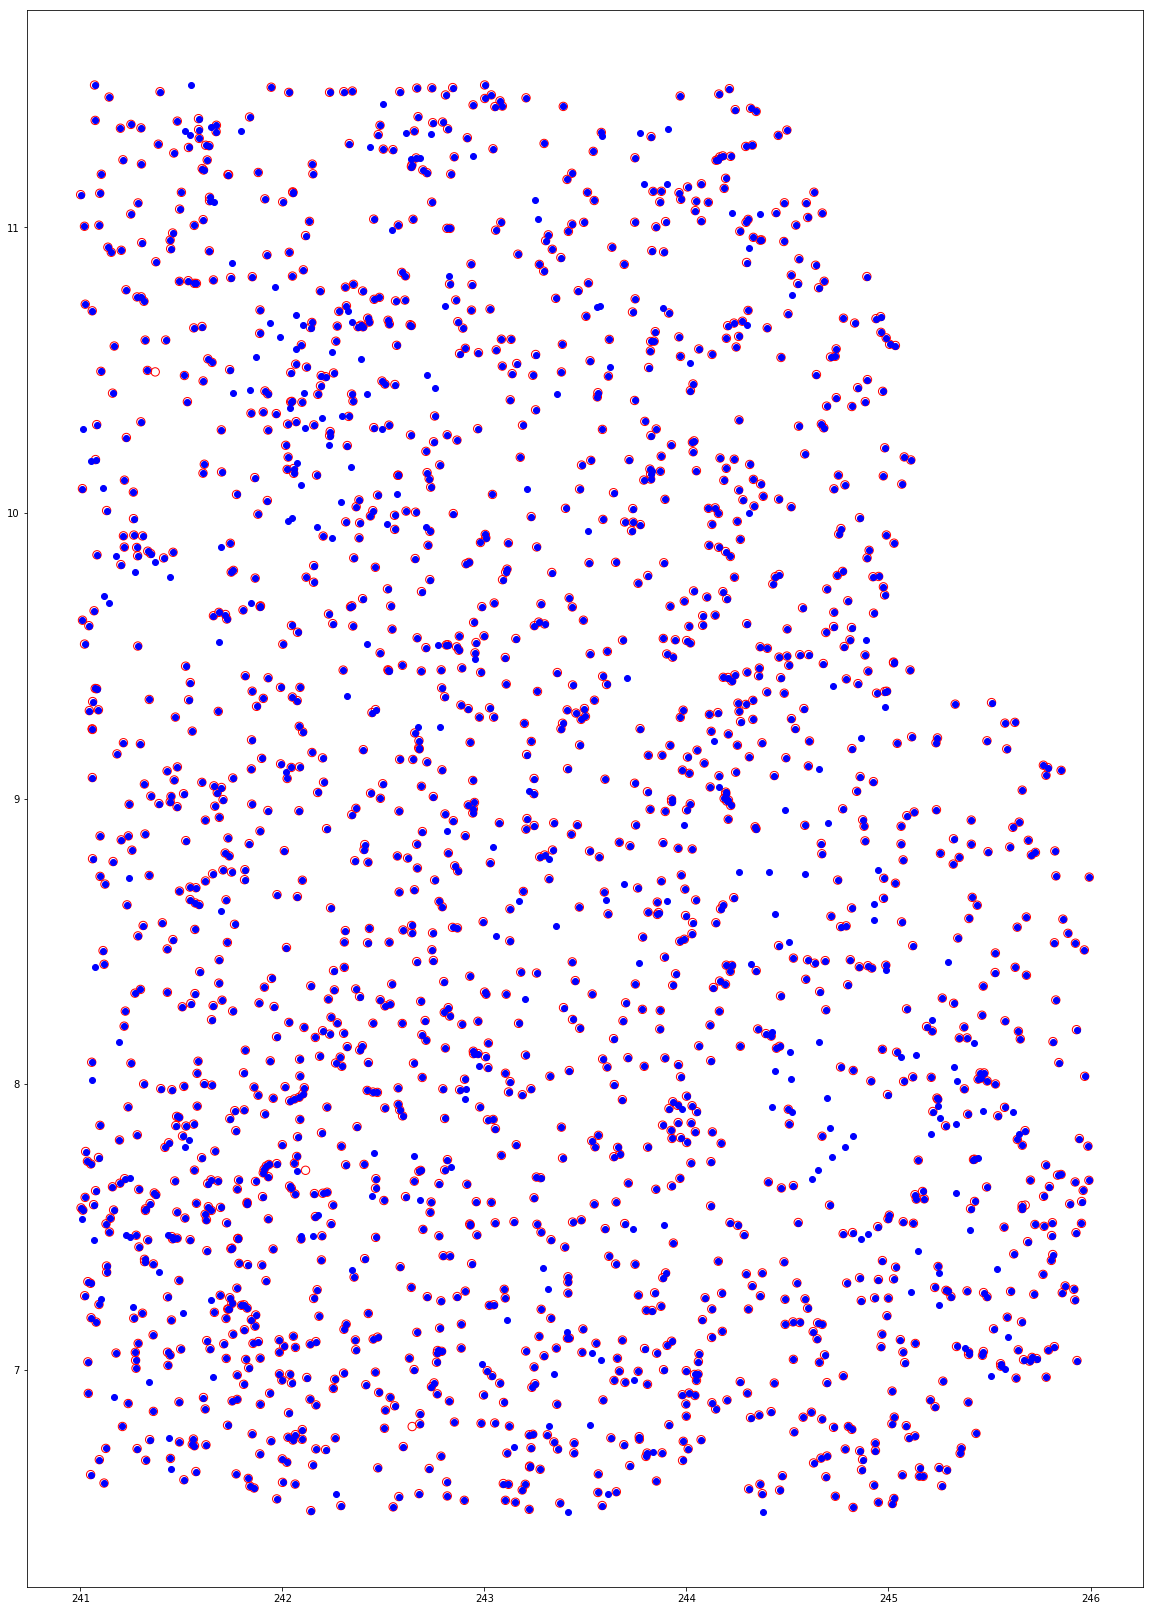

In [30]:
plt.figure(figsize=(20,29))
plt.scatter(raLRG8, decLRG8, facecolors='none', edgecolors='r', s=70)
plt.scatter(raLRG9, decLRG9, c='b')
plt.show()

In [31]:
from astropy.coordinates import SkyCoord, match_coordinates_sky                                   
from astropy import units as u       

DR8 = SkyCoord(ra=raLRG8*u.degree, dec=decLRG*u.degree)                          

DR9 = SkyCoord(ra=raLRG9*u.degree, dec=decLRG9*u.degree)                                

idx, sep2d, dist3d = match_coordinates_sky(DR8, DR9, nthneighbor=1)

print(len(idx))
print(len(raLRG8))
print(idx[0:20])

print(len(DR9[idx]))

1883
1883
[   0 1710    1    2    3    4    9   10   11   12   14   15   17   18
   19   20   21   22   23   24]
1883


In [64]:
LRG9idx = np.arange(0,2101)
print(len(LRG9idx))
print(LRG9idx[0:10])
print(idx[0:10])

newlist = list(set(LRG9idx) - set(idx))
print(type(newlist))
print(len(raLRG9[newlist]))

2101
[0 1 2 3 4 5 6 7 8 9]
[   0 1710    1    2    3    4    9   10   11   12]
<class 'list'>
223


In [65]:
from astropy.io import fits
import numpy as np

c1 = fits.Column(name='ra', array=raLRG9[newlist], format='D')

c2 = fits.Column(name='dec', array=decLRG9[newlist], format='D')

# c3 = fits.Column(name='maskbits', array=maskbitsBKG[0:50], format='K')

t = fits.BinTableHDU.from_columns([c1, c2])

t.writeto('/Users/mtownsend/Documents/LRG_Data/extra_LRGs_table.fits')

In [67]:
hdu = fits.open('/Users/mtownsend/Documents/LRG_Data/extra_LRGs_table.fits')
hdu.info()
data = hdu[1].data

ra = []
ra = data.field('ra')
print(len(ra))
dec = []
dec = data.field('dec')
print(dec)

Filename: /Users/mtownsend/Documents/LRG_Data/extra_LRGs_table.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     12   223R x 2C   [D, D]   
223
[10.29451903 10.08672189  9.84983424  6.97300101 10.98975289 11.2807896
  7.24316475  8.42402447  6.65155646  9.55656411  6.90437206  9.32100087
  8.01404726  7.50697382  8.6404919   7.45360685  8.40880963  7.34049812
  7.91338007  8.90598034  6.95622495  6.76170968  7.21798238  8.74377056
  8.04674382  7.19695153  8.01756401  7.91957159  7.80392887  8.42076792
  8.1811532   7.84625441  7.74587789  8.14672794  7.90086837  9.039214
  7.69815725  7.66911554  7.95068128  8.6052508   7.46330654  7.47347655
  7.77913379  9.19999708  7.81708026  7.77938129  8.74972947  7.24692834
  8.22471706  7.47140593  7.86006475  8.14551862  7.67209411 10.65825663
 10.92798812  7.52947557  9.42253869  8.14599727  7.46707428  7.46720147
  7.54102115  8.70098047

In [39]:
import pandas as pd

idx9 = np.array(LRG9idx, '<U16')
idxMatched = np.array(idx, '<U16')# big endian

newra = idx9.byteswap().newbyteorder() # force native byteorder
newdec = idxMatched.byteswap().newbyteorder()

df = pd.DataFrame({'ra': ra, 'dec': dec})
print(df[0:10])

New_DF = df.drop_duplicates()
print(New_DF[0:10])

                dec                ra
0  9.38517381066783  241.073288562146
1  9.33930083486314  241.060505703623
2  9.54061562281021  241.020470831719
3  9.62424005446054  241.010239978730
4  9.65725143847463  241.067634251660
5  10.2945190257345  241.014939513422
6  10.0867218913852  241.110810185363
7   9.8531153946819  241.082055815844
8  9.84983424234937  241.173977674344
9  6.86262673418064  241.617699474952
                dec                ra
0  9.38517381066783  241.073288562146
1  9.33930083486314  241.060505703623
2  9.54061562281021  241.020470831719
3  9.62424005446054  241.010239978730
4  9.65725143847463  241.067634251660
5  10.2945190257345  241.014939513422
6  10.0867218913852  241.110810185363
7   9.8531153946819  241.082055815844
8  9.84983424234937  241.173977674344
9  6.86262673418064  241.617699474952


In [31]:
# make tables

# make table of stars

from astropy.io import fits
import numpy as np

c1 = fits.Column(name='ra', array=raBKG[0:50], format='D')

c2 = fits.Column(name='dec', array=decBKG[0:50], format='D')

# c3 = fits.Column(name='maskbits', array=maskbitsBKG[0:50], format='K')

t = fits.BinTableHDU.from_columns([c1, c2])

t.writeto('/Users/mtownsend/Documents/LRG_Data/star_table.fits')

In [33]:
hdu = fits.open('/Users/mtownsend/Documents/LRG_Data/LRG_mediumflag_table.fits')
hdu.info()
data = hdu[1].data

ra = []
ra = data.field('ra')
print(ra)

dec = []
dec = data.field('dec')
print(dec)

Filename: /Users/mtownsend/Documents/LRG_Data/LRG_mediumflag_table.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU     12   62R x 2C   [D, D]   
[241.20801623 241.12535995 241.7707747  241.97175174 242.46077751
 242.62591815 245.26924002 245.10099777 245.01681048 244.78593772
 244.48780786 243.41079957 243.22140422 242.80061981 243.69426763
 243.92397298 243.80801088 243.90276765 244.12595373 244.16287663
 244.44549153 245.13754618 244.04927473 243.78882201 243.51481032
 243.51782728 243.5424501  242.63843699 242.55668119 244.21261006
 242.54722021 242.45231813 242.02345018 241.92707978 241.65837801
 245.06580367 244.88610313 244.90416751 244.36080344 244.42725974
 243.23192687 242.91998246 243.5229895  244.27931673 244.89291803
 242.70631626 242.30336494 242.00678639 241.3177488  241.28445404
 241.70604188 241.72076513 241.83541209 241.97309638 245.91766013
 245.51905569 245.28471323